In [14]:
import pandas as pd

In [17]:
train=pd.read_csv("D://ML/DATA/Digit Recognizer/train.csv")
test=pd.read_csv("D://ML/DATA/Digit Recognizer/test.csv")

In [18]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
import tensorflow as tf

In [20]:
x=train.drop('label',axis=1).values
y=train[['label']].values

In [21]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
y

array([[1],
       [0],
       [1],
       ...,
       [7],
       [6],
       [9]], dtype=int64)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [30]:
xtrain.shape

(31500, 784)

In [31]:
ytrain.shape

(31500, 1)

In [32]:
xtest.shape

(10500, 784)

In [33]:
ytest.shape

(10500, 1)

In [11]:
xtrain=tf.keras.utils.normalize(xtrain,axis=1)
xtest=tf.keras.utils.normalize(xtest,axis=1)

In [12]:
import matplotlib.pyplot as plt

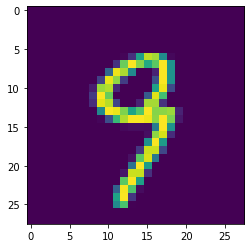

In [27]:
d=xtrain[1]
d.shape=(28,28)
plt.imshow(d)
plt.show()

In [16]:
tf.__version__

'1.14.0'

In [17]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [18]:
model.compile(optimizer= 'adam' , loss= 'sparse_categorical_crossentropy' , metrics=['accuracy'])

In [19]:
model.fit(xtrain,ytrain,epochs=6)

Epoch 1/6
31500/31500 [==============================] - 2s 61us/sample - loss: 0.4398 - acc: 0.8769
Epoch 2/6
31500/31500 [==============================] - 2s 60us/sample - loss: 0.1879 - acc: 0.94351
Epoch 3/6
31500/31500 [==============================] - 2s 59us/sample - loss: 0.1348 - acc: 0.9588
Epoch 4/6
31500/31500 [==============================] - 2s 51us/sample - loss: 0.1030 - acc: 0.9679
Epoch 5/6
31500/31500 [==============================] - 2s 49us/sample - loss: 0.0804 - acc: 0.9744
Epoch 6/6
31500/31500 [==============================] - 2s 51us/sample - loss: 0.0649 - acc: 0.9800


In [20]:
val_loss, val_acc=model.evaluate(xtest,ytest)
print(val_loss,val_acc)

10500/10500 [==============================] - 0s 27us/sample - loss: 0.1086 - acc: 0.9665
0.10860364643448875 0.9664762


In [21]:
pred=model.predict([xtest])

In [22]:
pred

array([[7.75215813e-05, 1.71446501e-07, 2.69521624e-05, ...,
        1.66701875e-06, 7.80022820e-05, 2.86907698e-06],
       [2.56536496e-05, 1.83542707e-05, 2.67053429e-06, ...,
        1.07735595e-07, 9.95697618e-01, 3.03177233e-03],
       [2.31332962e-07, 1.95860235e-08, 9.99833822e-01, ...,
        3.55981210e-05, 1.62451147e-06, 2.07161710e-09],
       ...,
       [9.99613225e-01, 3.18178905e-07, 2.06731929e-04, ...,
        5.81479026e-06, 2.73495266e-06, 1.81141841e-05],
       [1.97251584e-08, 9.92964149e-01, 2.95288828e-06, ...,
        2.37115077e-03, 6.72687311e-05, 4.36074799e-03],
       [9.79215145e-01, 8.92288412e-08, 5.24976756e-03, ...,
        3.90768563e-03, 1.27616859e-05, 1.15269860e-02]], dtype=float32)

In [23]:
import numpy as np

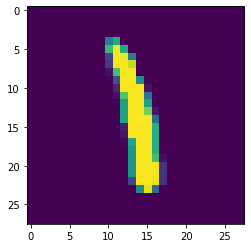

In [32]:
d=xtest[10]
d.shape=(28,28)
plt.imshow(d)
plt.show()

In [34]:
print(np.argmax(pred[10]))

1
